# Chapter 16 Fourier Series

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

## 16.1 Curve Fitting with Sinusoidal Functions

periodic function $f(t) = f(t + T) $
$$ f(t) = A_0 + C_1 \cos(\omega_0 t + \theta )$$
mean value $A_0$, amplitude $C_1$, angular frequency $\omega_0$, phase angle $\theta$  
$$ \omega_0 = 2 \pi f, \quad  f = \frac{1}{T}$$

## 16.1.1 Least square fit of a sinusoid

$$ y = A_0 + A_1 \cos  \omega_0 t + \sin \omega_0 t   + e $$
$$ S_r = \sum_{i=1}^N (y_i - (A_0 + A_1 \cos  \omega_0 t_i + \sin \omega_0 t_i))^2 $$

$$ z_0 = 1, z_1 = \cos(\omega_0 t), z_2 = \sin(\omega_0 t) $$

$$ \begin{bmatrix}
N & \sum \cos(\omega_0 t) & \sum \sin(\omega_0 t) \\
\sum \cos(\omega_0 t) & \sum \cos^2(\omega_0 t) & \sum \cos(\omega_0 t)\sin(\omega_0 t) \\
\sum \sin(\omega_0 t) & \sum \cos(\omega_0 t)\sin(\omega_0 t) & \sum \sin^2(\omega_0 t) \\
\end{bmatrix} 
\begin{bmatrix}
A_0 \\
A_1 \\
B_1 \\
\end{bmatrix} =
\begin{bmatrix}
\sum y \\
\sum y \cos(\omega_0 t) \\
\sum y \sin(\omega_0 t) \\
\end{bmatrix} 
$$

## Fourier approximation and interpolation

$$ f(t) = \frac{a_0}{2} + \sum_{k=1}^m [ a_k \cos(kt) + b_k \sin(kt) ]$$

Assume interval $[0, 2 \pi )$ is divided into $n$ equal subintervals

$$ t_0 = 0, \ t_1 = \frac{2 \pi}{n}, \ t_2 = 2 \frac{2 \pi}{n}, \ \cdots , t_k = k \frac{2 \pi}{n}, \  \cdots, \ t_{n-1} = (n-1)\frac{2 \pi}{n} $$

The corresponding data values $x_0, x_1, \cdots , x_{n-1}$. $n$ must be greater than $2m+1$.

$$ a_j = \frac{2}{n} \sum_{k=0}^{n-1} x_k \cos(j t_k), \ b_j = \frac{2}{n} \sum_{k=0}^{n-1} x_k \sin(j t_k)$$

### Example 1 Trigonometric approximation

0.8 -0.39999999999999986 1.9919186279062242


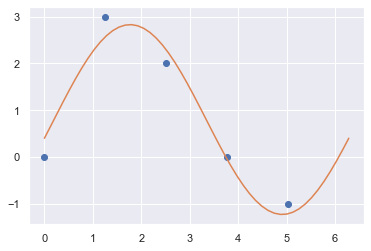

In [2]:
n = 5
t = np.arange(n)/n * 2*np.pi
x = np.array([0, 3, 2, 0, -1])

a0 = 1/n*np.sum(x)
a1 = 2/n*np.sum(x*np.cos(t))
b1 = 2/n*np.sum(x*np.sin(t))

print(a0, a1, b1)

tt = np.linspace(0, 2*np.pi)
xx = a0 + a1*np.cos(tt) + b1*np.sin(tt)

plt.plot(t, x, 'o')
plt.plot(tt, xx);

### Example 2 Trigonometric interpolation

0.8 -0.39999999999999986 1.9919186279062242 -0.3999999999999999 0.17961119063183406


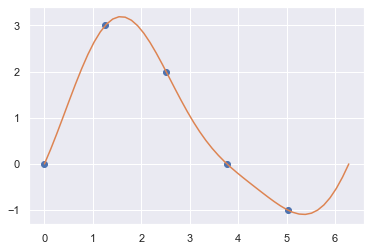

In [3]:
n = 5
t = np.arange(n)/n * 2*np.pi
x = np.array([0, 3, 2, 0, -1])

a0 = 1/n*np.sum(x)
a1 = 2/n*np.sum(x*np.cos(t))
b1 = 2/n*np.sum(x*np.sin(t))
a2 = 2/n*np.sum(x*np.cos(2*t))
b2 = 2/n*np.sum(x*np.sin(2*t))

print(a0, a1, b1, a2, b2)

tt = np.linspace(0, 2*np.pi)
xx = a0 + a1*np.cos(tt) + b1*np.sin(tt) + a2*np.cos(2*tt) + b2*np.sin(2*tt)

plt.plot(t, x, 'o')
plt.plot(tt, xx);

In [20]:
def trig_poly(x, m, npoint=100):
    """
    approximate or interpolate n data points
    at (0, 1, 2, ... , n-1)/n * 2 pi 
    use trigonometric polynomial of degree m
        2 m + 1 < n    for approximation
        2 m + 1 = n  or  2 m = n for interpolation
    """
    x = np.asarray(x)
    n = len(x)
    if 2*m + 1 > n:
        return None
    t = np.arange(n)/n * 2*np.pi
    a = np.zeros(m+1)
    b = np.zeros(m+1)
    
    a[0] = np.sum(x)/n
    for j in range(1, m+1):
        a[j] = 2/n*np.dot(x, np.cos(j*t))
        b[j] = 2/n*np.dot(x, np.sin(j*t))
    if n == 2*m:
        a[-1] = a[-1]/2
    
    tt = np.linspace(0, 2*np.pi, npoint)
    xx = a[0] 
    for j in range(1, m+1):
        xx = xx + a[j]*np.cos(j*tt) + b[j]*np.sin(j*tt)
        
    plt.plot(tt, xx, t, x, 'o');
    
    print(np.round(np.r_[a0, a], 4))
    print(np.round(np.r_[0, b], 4))

    return a, b

[0.8 0.5 0.1]
[0.     0.     0.6314]
[ 0.8  0.5  0.1 -0.   0.1]
[0.     0.     0.6314 0.     0.1963]
[ 0.8  0.5  0.1 -0.   0.1 -0.   0.1]
[0.     0.     0.6314 0.     0.1963 0.     0.1   ]


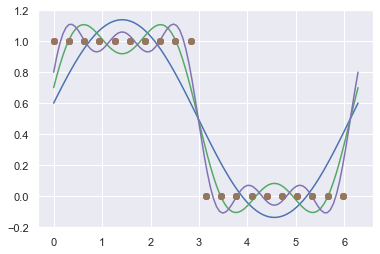

In [26]:
for m in range(1,7, 2):
    x = np.r_[np.ones(10), np.zeros(10)]
    a, b = trig_poly(x, m)

[ 0.8  0.8 -0.4 -0.4]
[0.     0.     1.9919 0.1796]


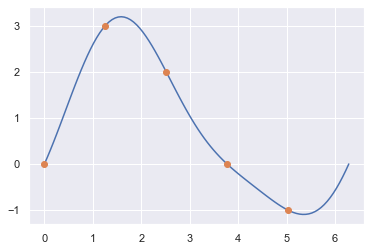

In [19]:
n = 5
t = np.arange(n)/n * 2*np.pi
x = np.array([0, 3, 2, 0, -1])
a, b = trig_poly(x, 2)

In [53]:
def calc(z, g, npoint=50):
    n = len(z)
    t = np.linspace(0, 2*np.pi, n+1)[:-1]

    m = n // 2
    a = np.empty(m+1, dtype=float)
    b = np.empty(m+1, dtype=float)
    a[0] = np.real(g[0])/n
    for k in range(1, m+1):
        a[k] = 2*np.real(g[k])/n
        b[k] = 2*np.imag(g[k])/n    

    tt = np.linspace(0, 2*np.pi, npoint)
    yy = a[0]
    if n % 2 == 1:
        for k in range(1, m + 1):
            yy += a[k]*np.cos(k*tt) + b[k]*np.sin(k*tt)
    else:
        for k in range(1, m):
            yy += a[k]*np.cos(k*tt) + b[k]*np.sin(k*tt)
        yy += a[m]*np.cos(m*tt)/2    

    plt.plot(t/np.pi, z, 'o')
    plt.plot(tt/np.pi, yy);
    return

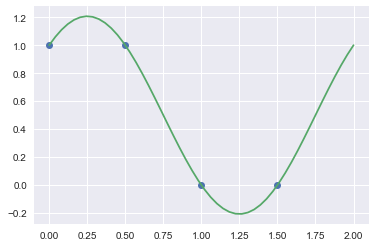

In [54]:
z = np.array([1, 1, 0.0, 0.0])
calc(z, fft4(z))

### FFT for 6 points, mixed RADIX

In [8]:
def fft6(z):
    n, r1, r2 = 6, 2, 3
    w = np.zeros(2*n, dtype=complex)
    for h in range(2*n):
        w[h] = np.exp(1J * 2*np.pi/n * h)
    s = np.zeros(n, dtype=complex)
    for k2 in range(r2):
        for j1 in range(r1):
            for k1 in range(r1):
                s[r1*k2 + j1] += z[r2*k1 + k2]*w[j1*r2*k1]
    g = np.zeros(n, dtype=complex)    
    for j2 in range(r2):
        for j1 in range(r1):
            for k2 in range(r2):
                g[r1*j2 + j1] += s[r1*k2 + j1]*w[(j1 + r1*j2)*k2]    
    return g

[ 9.+0.j -4.+0.j -0.+0.j -1.-0.j  0.+0.j -4.+0.j]


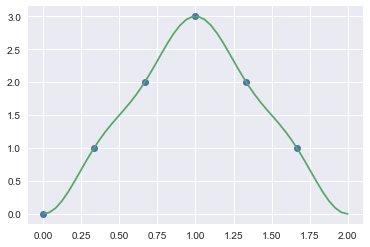

In [9]:
z = np.array([0, 1, 2, 3, 2, 1])
g = fft6(z)
calc(z, g)
print(np.round(g,4))

### np.fft.fft

[ 9.+0.j -4.+0.j  0.+0.j -1.-0.j  0.+0.j -4.+0.j]


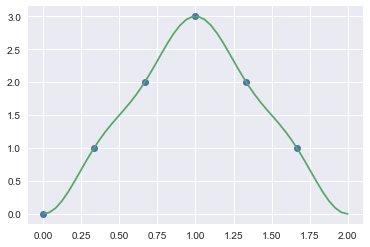

In [10]:
z = np.array([0, 1, 2, 3, 2, 1])
g = np.fft.fft(z)
print(np.round(g,4))
calc(z, g)

### example 16.3, chapra

[ 5. -0.  1.  0.]
[ 0. -0. -1.]


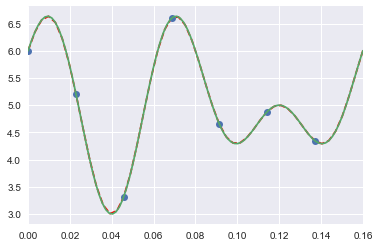

In [11]:
n = 7
tf = 0.16

t = np.linspace(0, tf)
y = 5 + np.cos(2*np.pi*12.5*t) + np.sin(2*np.pi*18.75*t) 
plt.plot(t, y, 'r--')

t = np.linspace(0, tf, n+1)[:-1]
y = 5 + np.cos(2*np.pi*12.5*t) + np.sin(2*np.pi*18.75*t) 
g = np.fft.fft(y)
np.round(g, 4)

m = n // 2
a = np.empty(m+1, dtype=float)
b = np.empty(m+1, dtype=float)
a[0] = np.real(g[0])/n

for k in range(1, m+1):
    a[k] = 2*np.real(g[k])/n
    b[k] = 2*np.imag(g[k])/n    

print(np.round(a, 4))    
print(np.round(b[1:], 4))    

npoint = 100
tt = np.linspace(0, 2*np.pi, npoint)
yy = a[0]
if n % 2 == 1:
    for k in range(1, m + 1):
        yy += a[k]*np.cos(k*tt) + b[k]*np.sin(k*tt)
else:
    for k in range(1, m):
        yy += a[k]*np.cos(k*tt) + b[k]*np.sin(k*tt)
    yy += a[m]*np.cos(m*tt)/2    

plt.plot(t, y, 'o')
plt.plot(tt/(2*np.pi)*tf, yy[::-1])
plt.xlim([0, tf]);

### example 16.4, chapra

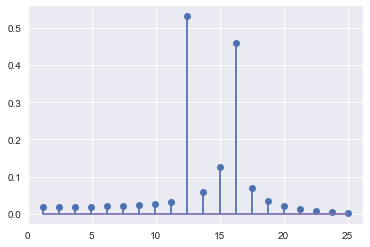

In [12]:
n = 40
dt = 0.02
T = (n+1)*dt
fs = 1/dt
t = np.arange(n)/fs
y = 5 + np.cos(2*np.pi*12.5*t) + np.sin(2*np.pi*16*t) 
g = np.fft.fft(y)/n
f = np.arange(n)*fs/n
# for i in range(n):
#     print("{:5d}{:15.5f}{:15.5f}{:15.5f}".format(i, f[i], np.real(g[i]), np.imag(g[i])))

m = n // 2
nyquist = fs/2    
fmin = 1/T
f = np.linspace(fmin, nyquist, m)
gp = g[:m+1]
gp = gp[1:]
P = np.abs(gp)
plt.stem(f, P);    
# [f, gp]

### problem 16.7

In [13]:
def calc_2(t, z, npoint=100):    
    T = t[-1]
    t, z = t[:-1], z[:-1]
    n = len(t)
    g = np.fft.fft(z)
    m = n // 2    
    a = np.array([np.real(g[0])/n] + [2*np.real(g[k])/n for k in range(1, m+1)])
    b = np.array([0] + [2*np.imag(g[k])/n for k in range(1, m+1)])

    tt = np.linspace(0, 2*np.pi, npoint)
    yy = a[0]
    if n % 2 == 1:
        for k in range(1, m + 1):
            yy += a[k]*np.cos(k*tt) + b[k]*np.sin(k*tt)
    else:
        for k in range(1, m):
            yy += a[k]*np.cos(k*tt) + b[k]*np.sin(k*tt)
        yy += a[m]*np.cos(m*tt)/2

    tt, yy = tt/(2*np.pi)*T, yy[::-1]
    return tt, yy, a, b

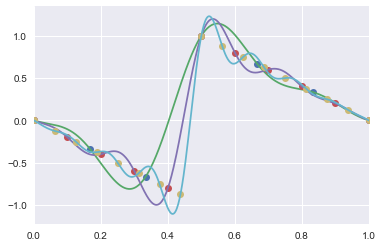

In [14]:
def fun(t, T):
    if t < T/2:
        return -t/(T/2)
    else:
        return -(t-T)/(T/2)
    
T = 1
for n in [6, 10, 16]:
    t = np.linspace(0, T, n + 1)
    z = np.array([fun(tt, T) for tt in t])
    plt.plot(t, z, 'o')
    
    tt, yy, a, b = calc_2(t, z, npoint=500)
    plt.plot(tt, yy)
    
    plt.xlim([0, T])
plt.show()